In [65]:
import pandas as pd
import protfasta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica" #somethings this one doesnt work
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['figure.dpi'] = 300


First, reading in all variants on Lambert TFs then intersecting to save SFARI TF.

In [18]:
from os import listdir
from os.path import isfile, join
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
TFs = [f for f in listdir("../soto_analysis/outputs/mutations/cds_bed_format/") if isfile(join("../soto_analysis/outputs/mutations/cds_bed_format/", f))]
TFs

['ENST00000326775',
 'ENST00000243056',
 'ENST00000311331',
 'ENST00000302342',
 'ENST00000012134',
 'ENST00000310826',
 'ENST00000335953',
 'ENST00000610704',
 'ENST00000328086',
 'ENST00000281523',
 'ENST00000344930',
 'ENST00000588221',
 'ENST00000239882',
 'ENST00000260643',
 'ENST00000329198',
 'ENST00000237316',
 'ENST00000302177',
 'ENST00000265755',
 'ENST00000262570',
 'ENST00000406360',
 'ENST00000332372',
 'ENST00000392842',
 'ENST00000270617',
 'ENST00000372469',
 'ENST00000359486',
 'ENST00000415922',
 'ENST00000040584',
 'ENST00000293471',
 'ENST00000329705',
 'ENST00000357727',
 'ENST00000311764',
 'ENST00000342665',
 'ENST00000266744',
 'ENST00000434436',
 'ENST00000314686',
 'ENST00000415914',
 'ENST00000242728',
 'ENST00000524983',
 'ENST00000372699',
 'ENST00000427442',
 'ENST00000297689',
 'ENST00000330070',
 'ENST00000373125',
 'ENST00000226067',
 'ENST00000448943',
 'ENST00000377115',
 'ENST00000451604',
 'ENST00000367387',
 'ENST00000338010',
 'ENST00000250448',


In [19]:
SFARI_TF_enst = set(pd.read_csv("../soto_analysis/outputs/TFs_table_proteins.txt", sep = "\t")["ENST"])
TFs = set(TFs) & SFARI_TF_enst
TFs # Only SFARI TFs

{'ENST00000056233',
 'ENST00000239243',
 'ENST00000241001',
 'ENST00000246672',
 'ENST00000250916',
 'ENST00000262238',
 'ENST00000262518',
 'ENST00000264637',
 'ENST00000265340',
 'ENST00000282549',
 'ENST00000288319',
 'ENST00000303329',
 'ENST00000309446',
 'ENST00000312233',
 'ENST00000315869',
 'ENST00000317216',
 'ENST00000318003',
 'ENST00000331340',
 'ENST00000335670',
 'ENST00000339562',
 'ENST00000341099',
 'ENST00000342988',
 'ENST00000348066',
 'ENST00000348332',
 'ENST00000355311',
 'ENST00000355995',
 'ENST00000356073',
 'ENST00000358127',
 'ENST00000359486',
 'ENST00000367265',
 'ENST00000372583',
 'ENST00000373036',
 'ENST00000373294',
 'ENST00000377022',
 'ENST00000377142',
 'ENST00000379044',
 'ENST00000380013',
 'ENST00000389506',
 'ENST00000395324',
 'ENST00000403491',
 'ENST00000428368',
 'ENST00000434704',
 'ENST00000437473',
 'ENST00000561208',
 'ENST00000592199'}

In [21]:
all_tf_var_dfs = []

for TF in TFs:
    if "ENST" in TF:
        print(TF)
        tf_vars = pd.read_csv("../soto_analysis/outputs/mutations/cds_expanded_iWES_v2_variants_snv_classified/" + TF + ".bed", sep = "\t", header = None)
        if len(tf_vars) == 0:
            display(tf_vars)
        all_tf_var_dfs.append(tf_vars)

ENST00000377142
ENST00000246672
ENST00000315869
ENST00000377022
ENST00000342988
ENST00000356073
ENST00000395324
ENST00000389506
ENST00000561208
ENST00000241001
ENST00000265340
ENST00000434704
ENST00000592199
ENST00000312233
ENST00000380013
ENST00000264637
ENST00000373294
ENST00000056233
ENST00000303329
ENST00000348066
ENST00000341099
ENST00000309446
ENST00000348332
ENST00000262238
ENST00000262518
ENST00000239243
ENST00000372583
ENST00000355311
ENST00000437473
ENST00000282549
ENST00000288319
ENST00000335670
ENST00000359486
ENST00000331340
ENST00000339562
ENST00000428368
ENST00000317216
ENST00000358127
ENST00000250916
ENST00000355995
ENST00000318003
ENST00000403491
ENST00000373036
ENST00000379044
ENST00000367265


In [27]:
all_tf_vars = pd.concat(all_tf_var_dfs)
all_tf_vars = all_tf_vars.rename(columns = {0 :"#CHROM", 
                                           2: "POS",
                                           8: "REF",
                                           9: "ALT"})
all_tf_vars["POS"] = all_tf_vars["POS"].astype(int)
all_tf_vars["#CHROM"] = "chr" + all_tf_vars["#CHROM"].astype(str)
all_tf_vars = all_tf_vars[all_tf_vars[13] == "No-Syn"]
all_tf_vars

,#CHROM,1,POS,3,4,5,6,7,REF,ALT,10,11,12,13
0,chr20,21511924,21511925,ENST00000377142,-1,20,21511924,21511925,A,T,0.000005,*,R,No-Syn
1,chr20,21511935,21511936,ENST00000377142,-1,20,21511935,21511936,T,G,0.000005,Q,P,No-Syn
2,chr20,21511942,21511943,ENST00000377142,-1,20,21511942,21511943,C,A,0.000005,A,S,No-Syn
4,chr20,21511948,21511949,ENST00000377142,-1,20,21511948,21511949,C,A,0.000009,V,F,No-Syn
7,chr20,21511954,21511955,ENST00000377142,-1,20,21511954,21511955,G,C,0.000019,P,A,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,chr1,202808271,202808272,ENST00000367265,-1,1,202808271,202808272,G,A,0.000005,R,C,No-Syn
825,chr1,202808273,202808274,ENST00000367265,-1,1,202808273,202808274,G,T,0.000028,P,Q,No-Syn
826,chr1,202808273,202808274,ENST00000367265,-1,1,202808273,202808274,G,C,0.000019,P,R,No-Syn
827,chr1,202808274,202808275,ENST00000367265,-1,1,202808274,202808275,G,A,0.000009,P,S,No-Syn


In [28]:
all_tf_vars_coords = all_tf_vars[["#CHROM", "POS"]]
all_tf_vars_coords = all_tf_vars_coords.drop_duplicates()
all_tf_vars_coords = all_tf_vars_coords.sort_values(by = "#CHROM")
all_tf_vars_coords = all_tf_vars_coords.sort_values(by = "POS")
all_tf_vars_coords = all_tf_vars_coords.set_index(keys = ["#CHROM", "POS"])
all_tf_vars_coords

Empty DataFrame
Columns: []
Index: [(chr2, 1791880), (chr2, 1791881), (chr2, 1791884), (chr2, 1791915), (chr2, 1791928), (chr2, 1791930), (chr2, 1791937), (chr2, 1791950), (chr2, 1791957), (chr2, 1791961), (chr2, 1791974), (chr2, 1792001), (chr2, 1792005), (chr2, 1792325), (chr2, 1792328), (chr2, 1792333), (chr2, 1792367), (chr2, 1792377), (chr2, 1792383), (chr2, 1792421), (chr2, 1792423), (chr2, 1801716), (chr2, 1801734), (chr2, 1801736), (chr2, 1801746), (chr2, 1801772), (chr2, 1801788), (chr2, 1809076), (chr2, 1839177), (chr2, 1839192), (chr2, 1839240), (chr2, 1839257), (chr2, 1839264), (chr2, 1839279), (chr2, 1839285), (chr2, 1839293), (chr2, 1839309), (chr2, 1839321), (chr2, 1839330), (chr2, 1839351), (chr2, 1840785), (chr2, 1840793), (chr2, 1840800), (chr2, 1840817), (chr2, 1851695), (chr19, 1854470), (chr19, 1854472), (chr19, 1854473), (chr19, 1854484), (chr19, 1854485), (chr19, 1854487), (chr19, 1854504), (chr19, 1854524), (chr19, 1854544), (chr19, 1854547), (chr19, 1854548), (chr19, 1854550), (chr19, 1854551), (chr19, 1854554), (chr19, 1854557), (chr19, 1854562), (chr19, 1854565), (chr19, 1854573), (chr19, 1854575), (chr19, 1854577), (chr19, 1854580), (chr19, 1854586), (chr19, 1854587), (chr19, 1854590), (chr19, 1854596), (chr19, 1854598), (chr19, 1854611), (chr19, 1854634), (chr19, 1854635), (chr19, 1854656), (chr19, 1854673), (chr19, 1854686), (chr19, 1854691), (chr19, 1854726), (chr19, 1854730), (chr19, 1854733), (chr19, 1854755), (chr19, 1863053), (chr19, 1863076), (chr19, 1863089), (chr19, 1863100), (chr19, 1863103), (chr19, 1863109), (chr19, 1863116), (chr19, 1863130), (chr19, 1863140), (chr19, 1863145), (chr19, 1863146), (chr19, 1863148), (chr19, 1863149), (chr19, 1863154), (chr19, 1863169), (chr19, 1863170), (chr19, 1863175), (chr19, 1863188), ...]

[11712 rows x 0 columns]

In [29]:
chunksize = 100000 
am_output = pd.DataFrame()
num_vars = 0
alpha_m = "../data/AlphaMissense_hg38.tsv"

# Reading in chunks, keeping rows overlapping a variant
for chunk in pd.read_csv(alpha_m, sep='\t', chunksize=chunksize, header = 3):
    chunk = chunk.set_index(keys = ["#CHROM", "POS"])
    joined = pd.merge(all_tf_vars_coords, chunk, left_index=True, right_index=True)
    am_output = pd.concat([am_output, joined])
    if len(joined):
        print(len(set(am_output.index)))
        # display(joined)

686
888
1809
2089
2181
2692
2877
3007
3089
3437
4035
4192
4391
4474
4604
4735
4938
6147
6555
6698
6864
6952
7159
7271
7723
7760
8030
8391
8489
8589
8740
8809
8914
9033
9708
10368
10433
10551
10664
10978
11135
11230
11320
11452
11572
11694


In [30]:
am_output = am_output.reset_index()
am_output

,#CHROM,POS,REF,ALT,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
0,chr1,10638950,A,C,hg38,Q86V15,ENST00000377022.8,S1758A,0.0695,likely_benign
1,chr1,10638950,A,G,hg38,Q86V15,ENST00000377022.8,S1758P,0.0826,likely_benign
2,chr1,10638950,A,T,hg38,Q86V15,ENST00000377022.8,S1758T,0.0899,likely_benign
3,chr1,10638962,T,C,hg38,Q86V15,ENST00000377022.8,T1754A,0.0437,likely_benign
4,chr1,10638962,T,G,hg38,Q86V15,ENST00000377022.8,T1754P,0.0528,likely_benign
...,...,...,...,...,...,...,...,...,...,...
32863,chrX,80031092,C,G,hg38,Q9Y458,ENST00000373294.8,A515G,0.0968,likely_benign
32864,chrX,80031092,C,T,hg38,Q9Y458,ENST00000373294.8,A515V,0.0918,likely_benign
32865,chrX,80031101,A,G,hg38,Q9Y458,ENST00000373294.8,H518R,0.0748,likely_benign
32866,chrX,80031101,A,T,hg38,Q9Y458,ENST00000373294.8,H518L,0.1275,likely_benign


In [31]:
# Now, only keeping if matches an ENST
am_output[["uniprot_id", "transcript_id"]].value_counts()
# Looks like only one ENST per uniprotID as expected, canonical uniprotID 

uniprot_id  transcript_id     
Q6ZRS2      ENST00000262518.9     3428
Q03164      ENST00000389506.10    2655
Q5T1R4      ENST00000372583.6     2565
Q86V15      ENST00000377022.8     1920
Q9UGU0      ENST00000359486.7     1883
Q6N021      ENST00000380013.8     1834
Q9UGL1      ENST00000367265.8     1406
Q15788      ENST00000348332.7     1303
O94983      ENST00000348066.8     1143
Q6P1N0      ENST00000318003.11    1126
Q9Y4A8      ENST00000056233.4      859
Q8NBF1      ENST00000312233.4      788
Q9UL68      ENST00000428368.7      744
P20393      ENST00000246672.4      591
Q9HBZ2      ENST00000303329.9      573
Q14872      ENST00000373036.5      565
Q92731      ENST00000341099.5      551
Q9NQB0      ENST00000355995.8      522
Q13422      ENST00000331340.8      443
P11473      ENST00000395324.6      440
P43354      ENST00000409572.5      433
Q96QS3      ENST00000379044.5      373
Q9H4W6      ENST00000355311.9      372
P15884      ENST00000564999.5      372
O14770      ENST00000561208.6    

In [32]:
all_tf_vars

,#CHROM,1,POS,3,4,5,6,7,REF,ALT,10,11,12,13
0,chr20,21511924,21511925,ENST00000377142,-1,20,21511924,21511925,A,T,0.000005,*,R,No-Syn
1,chr20,21511935,21511936,ENST00000377142,-1,20,21511935,21511936,T,G,0.000005,Q,P,No-Syn
2,chr20,21511942,21511943,ENST00000377142,-1,20,21511942,21511943,C,A,0.000005,A,S,No-Syn
4,chr20,21511948,21511949,ENST00000377142,-1,20,21511948,21511949,C,A,0.000009,V,F,No-Syn
7,chr20,21511954,21511955,ENST00000377142,-1,20,21511954,21511955,G,C,0.000019,P,A,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,chr1,202808271,202808272,ENST00000367265,-1,1,202808271,202808272,G,A,0.000005,R,C,No-Syn
825,chr1,202808273,202808274,ENST00000367265,-1,1,202808273,202808274,G,T,0.000028,P,Q,No-Syn
826,chr1,202808273,202808274,ENST00000367265,-1,1,202808273,202808274,G,C,0.000019,P,R,No-Syn
827,chr1,202808274,202808275,ENST00000367265,-1,1,202808274,202808275,G,A,0.000009,P,S,No-Syn


In [33]:
am_output["POS"] = am_output["POS"].astype(int)
all_tf_vars["POS"] = all_tf_vars["POS"].astype(int)

In [34]:
merged_tf = pd.merge(all_tf_vars, am_output, on = ["#CHROM","POS","REF","ALT"])
merged_tf

,#CHROM,1,POS,3,4,5,6,7,REF,ALT,10,11,12,13,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
0,chr20,21511935,21511936,ENST00000377142,-1,20,21511935,21511936,T,G,0.000005,Q,P,No-Syn,hg38,O95096,ENST00000377142.5,Q270P,0.0961,likely_benign
1,chr20,21511942,21511943,ENST00000377142,-1,20,21511942,21511943,C,A,0.000005,A,S,No-Syn,hg38,O95096,ENST00000377142.5,A268S,0.0713,likely_benign
2,chr20,21511948,21511949,ENST00000377142,-1,20,21511948,21511949,C,A,0.000009,V,F,No-Syn,hg38,O95096,ENST00000377142.5,V266F,0.1918,likely_benign
3,chr20,21511954,21511955,ENST00000377142,-1,20,21511954,21511955,G,C,0.000019,P,A,No-Syn,hg38,O95096,ENST00000377142.5,P264A,0.0986,likely_benign
4,chr20,21511955,21511956,ENST00000377142,-1,20,21511955,21511956,G,T,0.000009,H,Q,No-Syn,hg38,O95096,ENST00000377142.5,H263Q,0.1550,likely_benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12490,chr1,202808271,202808272,ENST00000367265,-1,1,202808271,202808272,G,A,0.000005,R,C,No-Syn,hg38,Q9UGL1,ENST00000367265.8,R12C,0.2548,likely_benign
12491,chr1,202808273,202808274,ENST00000367265,-1,1,202808273,202808274,G,T,0.000028,P,Q,No-Syn,hg38,Q9UGL1,ENST00000367265.8,P11Q,0.0756,likely_benign
12492,chr1,202808273,202808274,ENST00000367265,-1,1,202808273,202808274,G,C,0.000019,P,R,No-Syn,hg38,Q9UGL1,ENST00000367265.8,P11R,0.0715,likely_benign
12493,chr1,202808274,202808275,ENST00000367265,-1,1,202808274,202808275,G,A,0.000009,P,S,No-Syn,hg38,Q9UGL1,ENST00000367265.8,P11S,0.0710,likely_benign


In [35]:
# AD variants only
all_ad_var_dfs = []

for TF in TFs:
    ad_vars = pd.read_csv("../soto_analysis/outputs/mutations/domains_expanded_iWES_v2_variants_snv_classified/" + TF + ".bed", sep = "\t", header = None)
    all_ad_var_dfs.append(ad_vars)

In [39]:
all_ad_vars = pd.concat(all_ad_var_dfs)
all_ad_vars = all_ad_vars[all_ad_vars[21] == "No-Syn"]
all_ad_vars = all_ad_vars.rename(columns = {0 :"#CHROM", 
                                           2: "POS",
                                           16: "REF",
                                           17: "ALT"})
all_ad_vars["#CHROM"] = "chr" + all_ad_vars["#CHROM"].astype(str)
all_ad_vars["POS"] = all_ad_vars["POS"].astype(int)
all_ad_vars = all_ad_vars[all_ad_vars[3] == "AD"]
all_ad_vars

,#CHROM,1,POS,3,4,5,6,7,8,9,...,12,13,14,15,REF,ALT,18,19,20,21
48,chr20,21511935,21511936,AD,NaN,.,-,ENST00000377142,20,21511935,...,-1,20,21511935,21511936,T,G,0.000005,Q,P,No-Syn
49,chr20,21511942,21511943,AD,NaN,.,-,ENST00000377142,20,21511942,...,-1,20,21511942,21511943,C,A,0.000005,A,S,No-Syn
51,chr20,21511948,21511949,AD,NaN,.,-,ENST00000377142,20,21511948,...,-1,20,21511948,21511949,C,A,0.000009,V,F,No-Syn
54,chr20,21511954,21511955,AD,NaN,.,-,ENST00000377142,20,21511954,...,-1,20,21511954,21511955,G,C,0.000019,P,A,No-Syn
55,chr20,21511955,21511956,AD,NaN,.,-,ENST00000377142,20,21511955,...,-1,20,21511955,21511956,G,T,0.000009,H,Q,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,chr1,202731925,202731926,AD,NaN,.,-,ENST00000367265,1,202731925,...,-1,1,202731925,202731926,G,A,0.000005,P,L,No-Syn
88,chr1,202731928,202731929,AD,NaN,.,-,ENST00000367265,1,202731928,...,-1,1,202731928,202731929,G,A,0.000005,P,L,No-Syn
90,chr1,202731930,202731931,AD,NaN,.,-,ENST00000367265,1,202731930,...,-1,1,202731930,202731931,T,G,0.000019,Q,H,No-Syn
91,chr1,202731931,202731932,AD,NaN,.,-,ENST00000367265,1,202731931,...,-1,1,202731931,202731932,T,C,0.000009,Q,R,No-Syn


In [48]:
all_dbd_vars = pd.concat(all_ad_var_dfs)
all_dbd_vars = all_dbd_vars[all_dbd_vars[21] == "No-Syn"]
all_dbd_vars = all_dbd_vars.rename(columns = {0 :"#CHROM", 
                                           2: "POS",
                                           16: "REF",
                                           17: "ALT"})
all_dbd_vars["#CHROM"] = "chr" + all_dbd_vars["#CHROM"].astype(str)
all_dbd_vars["POS"] = all_dbd_vars["POS"].astype(int)
all_dbd_vars = all_dbd_vars[all_dbd_vars[3] == "DBD"]
all_dbd_vars = all_dbd_vars.drop_duplicates()
all_dbd_vars

,#CHROM,1,POS,3,4,5,6,7,8,9,...,12,13,14,15,REF,ALT,18,19,20,21
1,chr20,21512191,21512192,DBD,NaN,.,-,ENST00000377142,20,21512191,...,-1,20,21512191,21512192,G,C,0.000005,R,G,No-Syn
10,chr20,21512241,21512242,DBD,NaN,.,-,ENST00000377142,20,21512241,...,-1,20,21512241,21512242,G,A,0.000005,T,M,No-Syn
13,chr20,21512247,21512248,DBD,NaN,.,-,ENST00000377142,20,21512247,...,-1,20,21512247,21512248,C,T,0.000023,R,H,No-Syn
17,chr20,21512259,21512260,DBD,NaN,.,-,ENST00000377142,20,21512259,...,-1,20,21512259,21512260,G,C,0.000005,A,G,No-Syn
20,chr20,21512271,21512272,DBD,NaN,.,-,ENST00000377142,20,21512271,...,-1,20,21512271,21512272,C,T,0.000009,R,H,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,chr1,202774639,202774640,DBD,NaN,.,-,ENST00000367265,1,202774639,...,-1,1,202774639,202774640,C,G,0.000009,K,N,No-Syn
32,chr1,202774659,202774660,DBD,NaN,.,-,ENST00000367265,1,202774659,...,-1,1,202774659,202774660,T,A,0.000009,I,F,No-Syn
34,chr1,202774662,202774663,DBD,NaN,.,-,ENST00000367265,1,202774662,...,-1,1,202774662,202774663,T,G,0.000005,K,Q,No-Syn
36,chr1,202774709,202774710,DBD,NaN,.,-,ENST00000367265,1,202774709,...,-1,1,202774709,202774710,A,G,0.000005,F,S,No-Syn


In [49]:
merged_ad = pd.merge(all_ad_vars, am_output, on = ["#CHROM","POS","REF","ALT"])
merged_ad

,#CHROM,1,POS,3,4,5,6,7,8,9,...,18,19,20,21,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
0,chr20,21511935,21511936,AD,NaN,.,-,ENST00000377142,20,21511935,...,0.000005,Q,P,No-Syn,hg38,O95096,ENST00000377142.5,Q270P,0.0961,likely_benign
1,chr20,21511942,21511943,AD,NaN,.,-,ENST00000377142,20,21511942,...,0.000005,A,S,No-Syn,hg38,O95096,ENST00000377142.5,A268S,0.0713,likely_benign
2,chr20,21511948,21511949,AD,NaN,.,-,ENST00000377142,20,21511948,...,0.000009,V,F,No-Syn,hg38,O95096,ENST00000377142.5,V266F,0.1918,likely_benign
3,chr20,21511954,21511955,AD,NaN,.,-,ENST00000377142,20,21511954,...,0.000019,P,A,No-Syn,hg38,O95096,ENST00000377142.5,P264A,0.0986,likely_benign
4,chr20,21511955,21511956,AD,NaN,.,-,ENST00000377142,20,21511955,...,0.000009,H,Q,No-Syn,hg38,O95096,ENST00000377142.5,H263Q,0.1550,likely_benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,chr1,202731925,202731926,AD,NaN,.,-,ENST00000367265,1,202731925,...,0.000005,P,L,No-Syn,hg38,Q9UGL1,ENST00000367265.8,P1308L,0.0622,likely_benign
3167,chr1,202731928,202731929,AD,NaN,.,-,ENST00000367265,1,202731928,...,0.000005,P,L,No-Syn,hg38,Q9UGL1,ENST00000367265.8,P1307L,0.0612,likely_benign
3168,chr1,202731930,202731931,AD,NaN,.,-,ENST00000367265,1,202731930,...,0.000019,Q,H,No-Syn,hg38,Q9UGL1,ENST00000367265.8,Q1306H,0.1180,likely_benign
3169,chr1,202731931,202731932,AD,NaN,.,-,ENST00000367265,1,202731931,...,0.000009,Q,R,No-Syn,hg38,Q9UGL1,ENST00000367265.8,Q1306R,0.0884,likely_benign


In [50]:
merged_ad.to_csv("../output/alphamissense_path_preds_AD_vars.csv")

In [51]:
merged_dbd = pd.merge(all_dbd_vars, am_output, on = ["#CHROM","POS","REF","ALT"])
merged_dbd

,#CHROM,1,POS,3,4,5,6,7,8,9,...,18,19,20,21,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
0,chr20,21512191,21512192,DBD,NaN,.,-,ENST00000377142,20,21512191,...,0.000005,R,G,No-Syn,hg38,O95096,ENST00000377142.5,R185G,0.9979,likely_pathogenic
1,chr20,21512241,21512242,DBD,NaN,.,-,ENST00000377142,20,21512241,...,0.000005,T,M,No-Syn,hg38,O95096,ENST00000377142.5,T168M,0.9991,likely_pathogenic
2,chr20,21512247,21512248,DBD,NaN,.,-,ENST00000377142,20,21512247,...,0.000023,R,H,No-Syn,hg38,O95096,ENST00000377142.5,R166H,0.3172,likely_benign
3,chr20,21512259,21512260,DBD,NaN,.,-,ENST00000377142,20,21512259,...,0.000005,A,G,No-Syn,hg38,O95096,ENST00000377142.5,A162G,0.9803,likely_pathogenic
4,chr20,21512271,21512272,DBD,NaN,.,-,ENST00000377142,20,21512271,...,0.000009,R,H,No-Syn,hg38,O95096,ENST00000377142.5,R158H,0.9999,likely_pathogenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,chr1,202774639,202774640,DBD,NaN,.,-,ENST00000367265,1,202774639,...,0.000009,K,N,No-Syn,hg38,Q9UGL1,ENST00000367265.8,K126N,0.9621,likely_pathogenic
2506,chr1,202774659,202774660,DBD,NaN,.,-,ENST00000367265,1,202774659,...,0.000009,I,F,No-Syn,hg38,Q9UGL1,ENST00000367265.8,I120F,0.7570,likely_pathogenic
2507,chr1,202774662,202774663,DBD,NaN,.,-,ENST00000367265,1,202774662,...,0.000005,K,Q,No-Syn,hg38,Q9UGL1,ENST00000367265.8,K119Q,0.7398,likely_pathogenic
2508,chr1,202774709,202774710,DBD,NaN,.,-,ENST00000367265,1,202774709,...,0.000005,F,S,No-Syn,hg38,Q9UGL1,ENST00000367265.8,F103S,0.9991,likely_pathogenic


In [52]:
merged_tf_minus_ad = pd.merge(merged_tf, merged_ad[['#CHROM','POS', 'REF', 'ALT']], 
                                                    on=['#CHROM','POS', 'REF', 'ALT'], how="outer", indicator=True)
merged_tf_minus_ad = merged_tf_minus_ad[merged_tf_minus_ad['_merge'] == 'left_only']
merged_tf_minus_ad = merged_tf_minus_ad.drop(columns = "_merge")
merged_tf_minus_ad

,#CHROM,1,POS,3,4,5,6,7,REF,ALT,10,11,12,13,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
0,chr1,10638949,10638950,ENST00000377022,-1,1,10638949,10638950,A,T,0.000014,S,T,No-Syn,hg38,Q86V15,ENST00000377022.8,S1758T,0.0899,likely_benign
1,chr1,10638961,10638962,ENST00000377022,-1,1,10638961,10638962,T,C,0.000005,T,A,No-Syn,hg38,Q86V15,ENST00000377022.8,T1754A,0.0437,likely_benign
2,chr1,10638963,10638964,ENST00000377022,-1,1,10638963,10638964,G,A,0.000005,P,L,No-Syn,hg38,Q86V15,ENST00000377022.8,P1753L,0.2777,likely_benign
3,chr1,10638963,10638964,ENST00000377022,-1,1,10638963,10638964,G,C,0.000009,P,R,No-Syn,hg38,Q86V15,ENST00000377022.8,P1753R,0.1449,likely_benign
4,chr1,10638964,10638965,ENST00000377022,-1,1,10638964,10638965,G,A,0.000009,P,S,No-Syn,hg38,Q86V15,ENST00000377022.8,P1753S,0.0978,likely_benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12490,chrX,80031061,80031062,ENST00000373294,1,X,80031061,80031062,G,T,0.000014,G,V,No-Syn,hg38,Q9Y458,ENST00000373294.8,G505V,0.0942,likely_benign
12491,chrX,80031066,80031067,ENST00000373294,1,X,80031066,80031067,T,C,0.000056,C,R,No-Syn,hg38,Q9Y458,ENST00000373294.8,C507R,0.0901,likely_benign
12492,chrX,80031083,80031084,ENST00000373294,1,X,80031083,80031084,G,C,0.000028,W,C,No-Syn,hg38,Q9Y458,ENST00000373294.8,W512C,0.2740,likely_benign
12493,chrX,80031091,80031092,ENST00000373294,1,X,80031091,80031092,C,A,0.000084,A,E,No-Syn,hg38,Q9Y458,ENST00000373294.8,A515E,0.1105,likely_benign


In [53]:
merged_tf_minus_ad_and_dbd = pd.merge(merged_tf_minus_ad, merged_dbd[['#CHROM','POS', 'REF', 'ALT']], 
                                                    on=['#CHROM','POS', 'REF', 'ALT'], how="outer", indicator=True)
merged_tf_minus_ad_and_dbd = merged_tf_minus_ad_and_dbd[merged_tf_minus_ad_and_dbd['_merge'] == 'left_only']
merged_tf_minus_ad_and_dbd

,#CHROM,1,POS,3,4,5,6,7,REF,ALT,...,11,12,13,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class,_merge
0,chr1,10638949.0,10638950,ENST00000377022,-1.0,1,10638949.0,10638950.0,A,T,...,S,T,No-Syn,hg38,Q86V15,ENST00000377022.8,S1758T,0.0899,likely_benign,left_only
1,chr1,10638961.0,10638962,ENST00000377022,-1.0,1,10638961.0,10638962.0,T,C,...,T,A,No-Syn,hg38,Q86V15,ENST00000377022.8,T1754A,0.0437,likely_benign,left_only
2,chr1,10638963.0,10638964,ENST00000377022,-1.0,1,10638963.0,10638964.0,G,A,...,P,L,No-Syn,hg38,Q86V15,ENST00000377022.8,P1753L,0.2777,likely_benign,left_only
3,chr1,10638963.0,10638964,ENST00000377022,-1.0,1,10638963.0,10638964.0,G,C,...,P,R,No-Syn,hg38,Q86V15,ENST00000377022.8,P1753R,0.1449,likely_benign,left_only
4,chr1,10638964.0,10638965,ENST00000377022,-1.0,1,10638964.0,10638965.0,G,A,...,P,S,No-Syn,hg38,Q86V15,ENST00000377022.8,P1753S,0.0978,likely_benign,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9555,chrX,80031061.0,80031062,ENST00000373294,1.0,X,80031061.0,80031062.0,G,T,...,G,V,No-Syn,hg38,Q9Y458,ENST00000373294.8,G505V,0.0942,likely_benign,left_only
9556,chrX,80031066.0,80031067,ENST00000373294,1.0,X,80031066.0,80031067.0,T,C,...,C,R,No-Syn,hg38,Q9Y458,ENST00000373294.8,C507R,0.0901,likely_benign,left_only
9557,chrX,80031083.0,80031084,ENST00000373294,1.0,X,80031083.0,80031084.0,G,C,...,W,C,No-Syn,hg38,Q9Y458,ENST00000373294.8,W512C,0.2740,likely_benign,left_only
9558,chrX,80031091.0,80031092,ENST00000373294,1.0,X,80031091.0,80031092.0,C,A,...,A,E,No-Syn,hg38,Q9Y458,ENST00000373294.8,A515E,0.1105,likely_benign,left_only


In [54]:
np.mean(merged_ad["am_pathogenicity"])

0.2576855566067487

In [55]:
np.mean(merged_tf_minus_ad["am_pathogenicity"])

0.3050651973401974

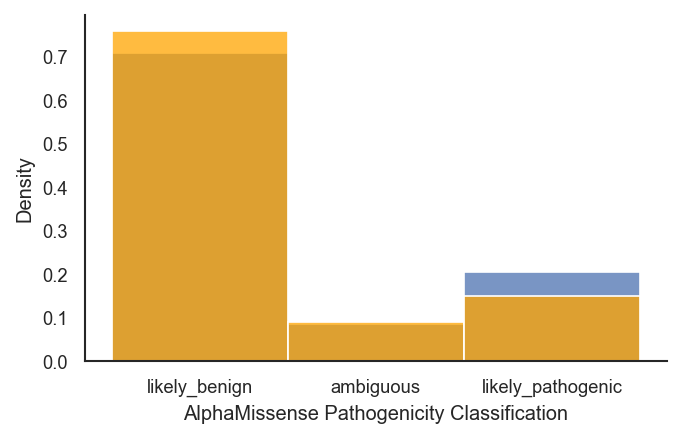

In [81]:
sns.set_theme(rc={'figure.figsize':(5,3), 'figure.dpi':150})
sns.set_theme('paper')
sns.set_style("white")

sns.histplot(merged_tf_minus_ad["am_class"], stat = "density")
sns.histplot(merged_ad["am_class"], stat = "density", color = "orange")
plt.xlabel("AlphaMissense Pathogenicity Classification")
sns.despine();

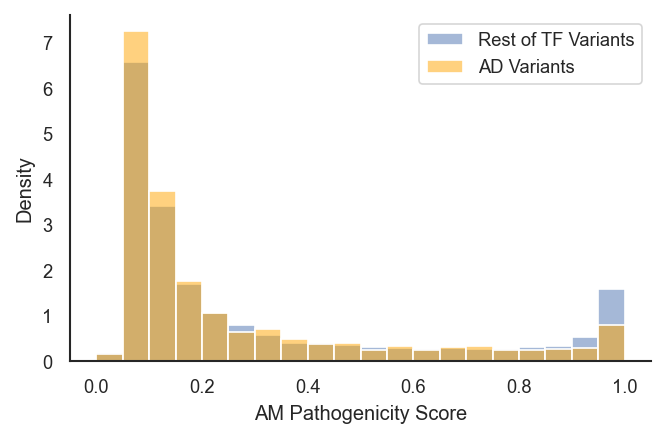

In [82]:
bins = np.arange(0, 1.05, 0.05)
sns.histplot(merged_tf_minus_ad["am_pathogenicity"], stat = "density", label = "Rest of TF Variants", color = "b", bins = bins, alpha = 0.5)
sns.histplot(merged_ad["am_pathogenicity"], stat = "density", label = "AD Variants", color = "orange", bins = bins, alpha = 0.5)
plt.xlabel("AM Pathogenicity Score")
plt.legend()
sns.despine();

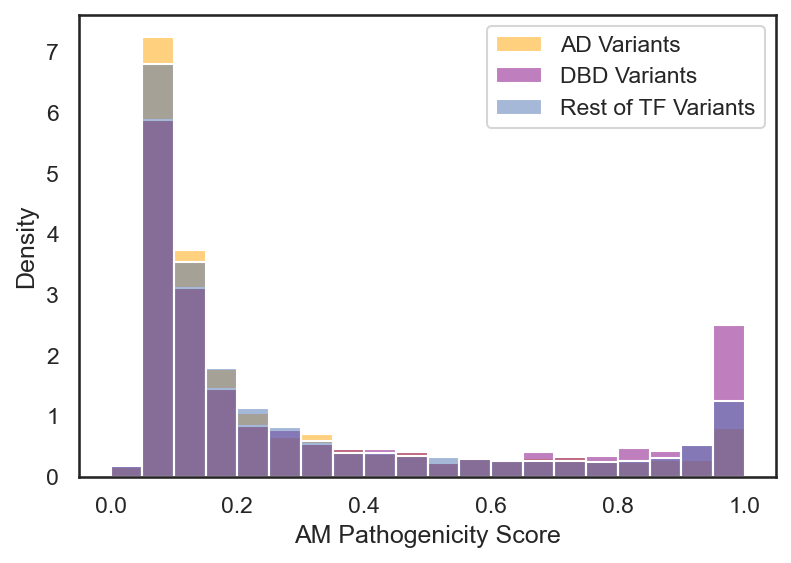

In [58]:
bins = np.arange(0, 1.05, 0.05)
sns.histplot(merged_ad["am_pathogenicity"], stat = "density", label = "AD Variants", color = "orange",bins = bins, alpha = 0.5)
sns.histplot(merged_dbd["am_pathogenicity"], stat = "density", label = "DBD Variants", color = "purple", bins = bins, alpha = 0.5)
sns.histplot(merged_tf_minus_ad_and_dbd["am_pathogenicity"], stat = "density", label = "Rest of TF Variants", color = "b", bins = bins, alpha = 0.5)

plt.xlabel("AM Pathogenicity Score")
plt.legend();

Sampling

In [59]:
len(merged_ad)

3171

In [60]:
sample_expec_pathog_avgs = []
for i in range(10000):
    sampled_ad_vars = merged_tf.sample(n = len(merged_ad), replace=True)
    expec_pathog_avg = np.mean(sampled_ad_vars["am_pathogenicity"])
    sample_expec_pathog_avgs.append(expec_pathog_avg)

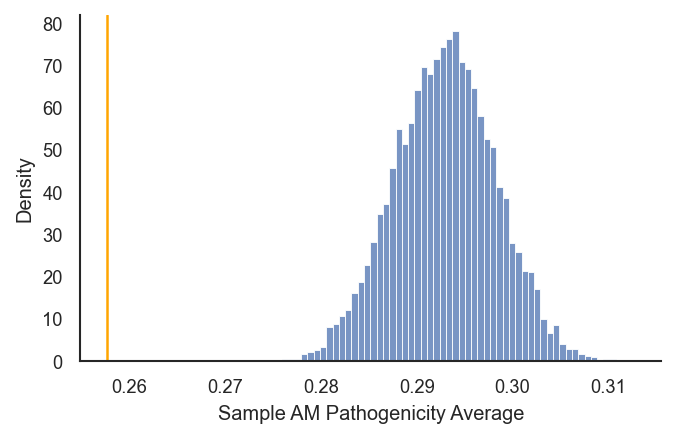

In [83]:
sns.histplot(sample_expec_pathog_avgs, stat = "density")
plt.axvline(np.mean(merged_ad["am_pathogenicity"]), 0,1, color = "orange")
plt.xlabel("Sample AM Pathogenicity Average")
sns.despine();

In [62]:
len(merged_ad)

3171

In [63]:
# DBD
len(merged_dbd)

2510

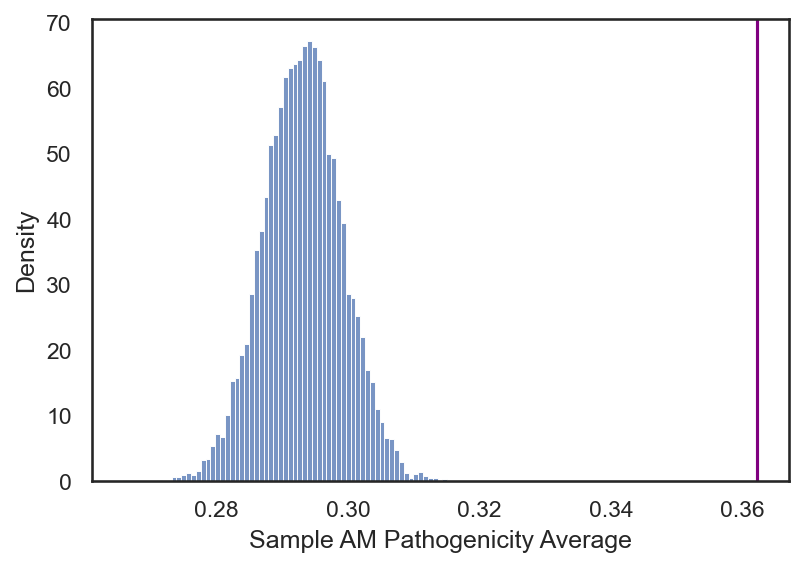

In [64]:
sample_expec_pathog_avgs_dbd = []
for i in range(10000):
    sampled_dbd_vars = merged_tf.sample(n = len(merged_dbd), replace=True)
    expec_pathog_avg_dbd = np.mean(sampled_dbd_vars["am_pathogenicity"])
    sample_expec_pathog_avgs_dbd.append(expec_pathog_avg_dbd)

sns.histplot(sample_expec_pathog_avgs_dbd, stat = "density")
plt.axvline(np.mean(merged_dbd["am_pathogenicity"]), 0,1, color = "purple")
plt.xlabel("Sample AM Pathogenicity Average");

# Residue change and average pathogenicity

In [206]:
merged_ad_for_heatmap = merged_ad.rename(columns = {19: "orig_AA", 20: "new_AA"})[["orig_AA", "new_AA", "am_pathogenicity"]]
merged_ad_for_heatmap

,orig_AA,new_AA,am_pathogenicity
0,Q,P,0.0961
1,A,S,0.0713
2,V,F,0.1918
3,P,A,0.0986
4,H,Q,0.1550
...,...,...,...
3166,P,L,0.0622
3167,P,L,0.0612
3168,Q,H,0.1180
3169,Q,R,0.0884


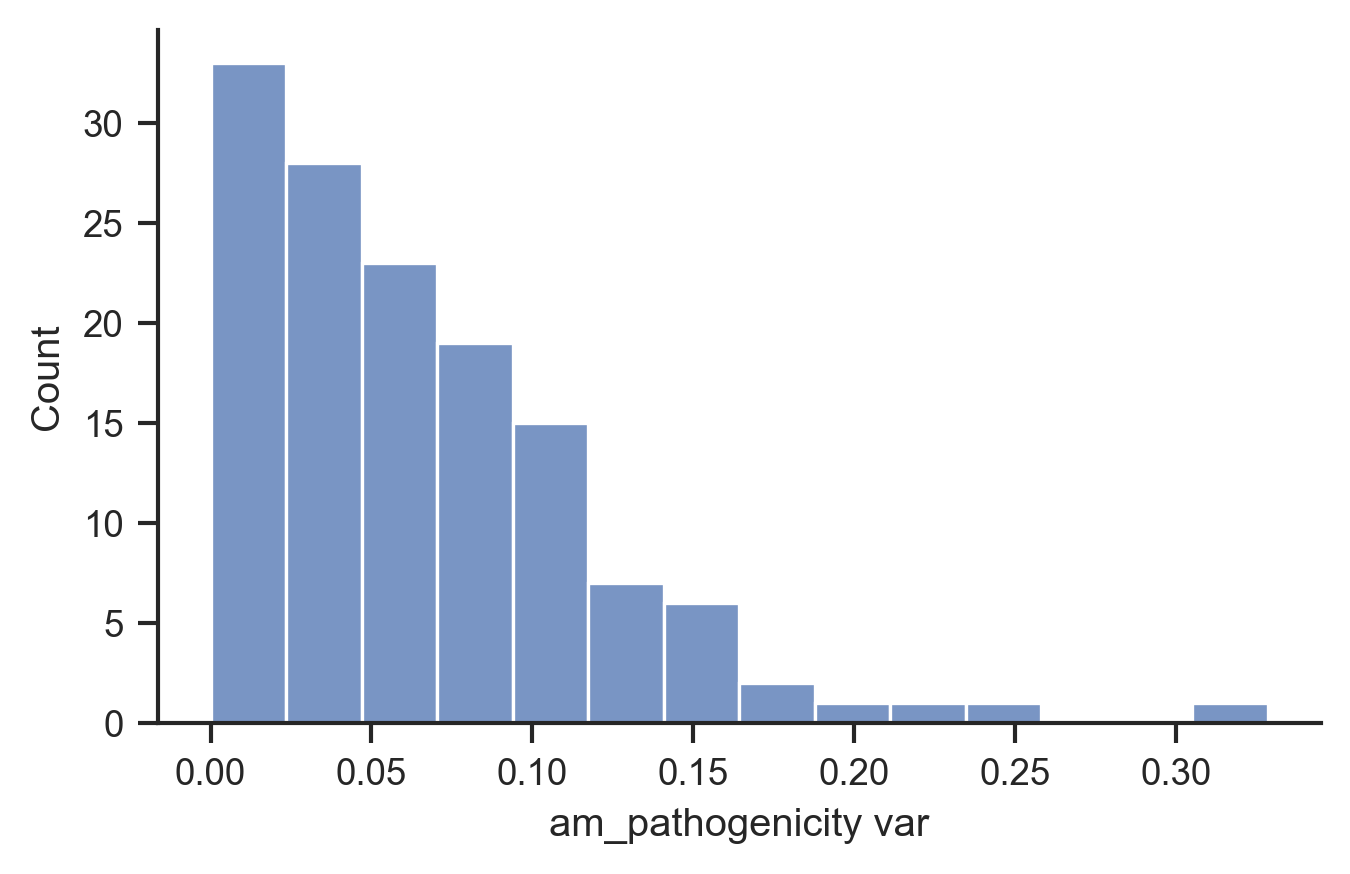

In [207]:
variance_per_change = merged_ad_for_heatmap.groupby(["orig_AA", "new_AA"]).agg(['mean', 'count', 'var']).reset_index()
variance_per_change.columns = [' '.join(col).strip() for col in variance_per_change.columns.values]
sns.histplot(variance_per_change["am_pathogenicity var"])
sns.despine();

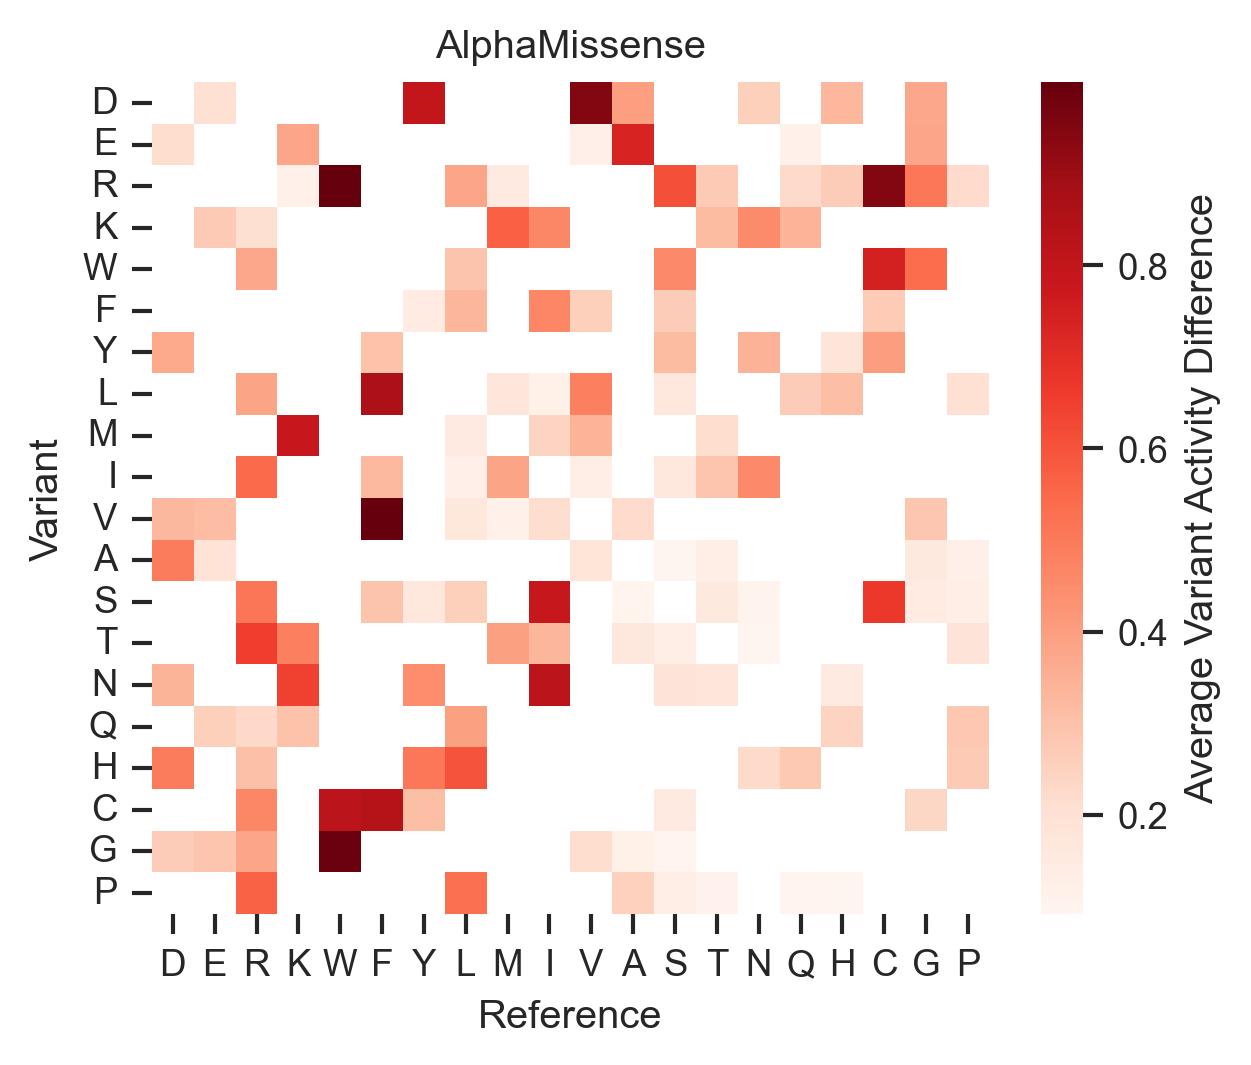

Text(0.5, 1.0, 'Mean AlphaMissense Pathogenicity, SFARI ADs')

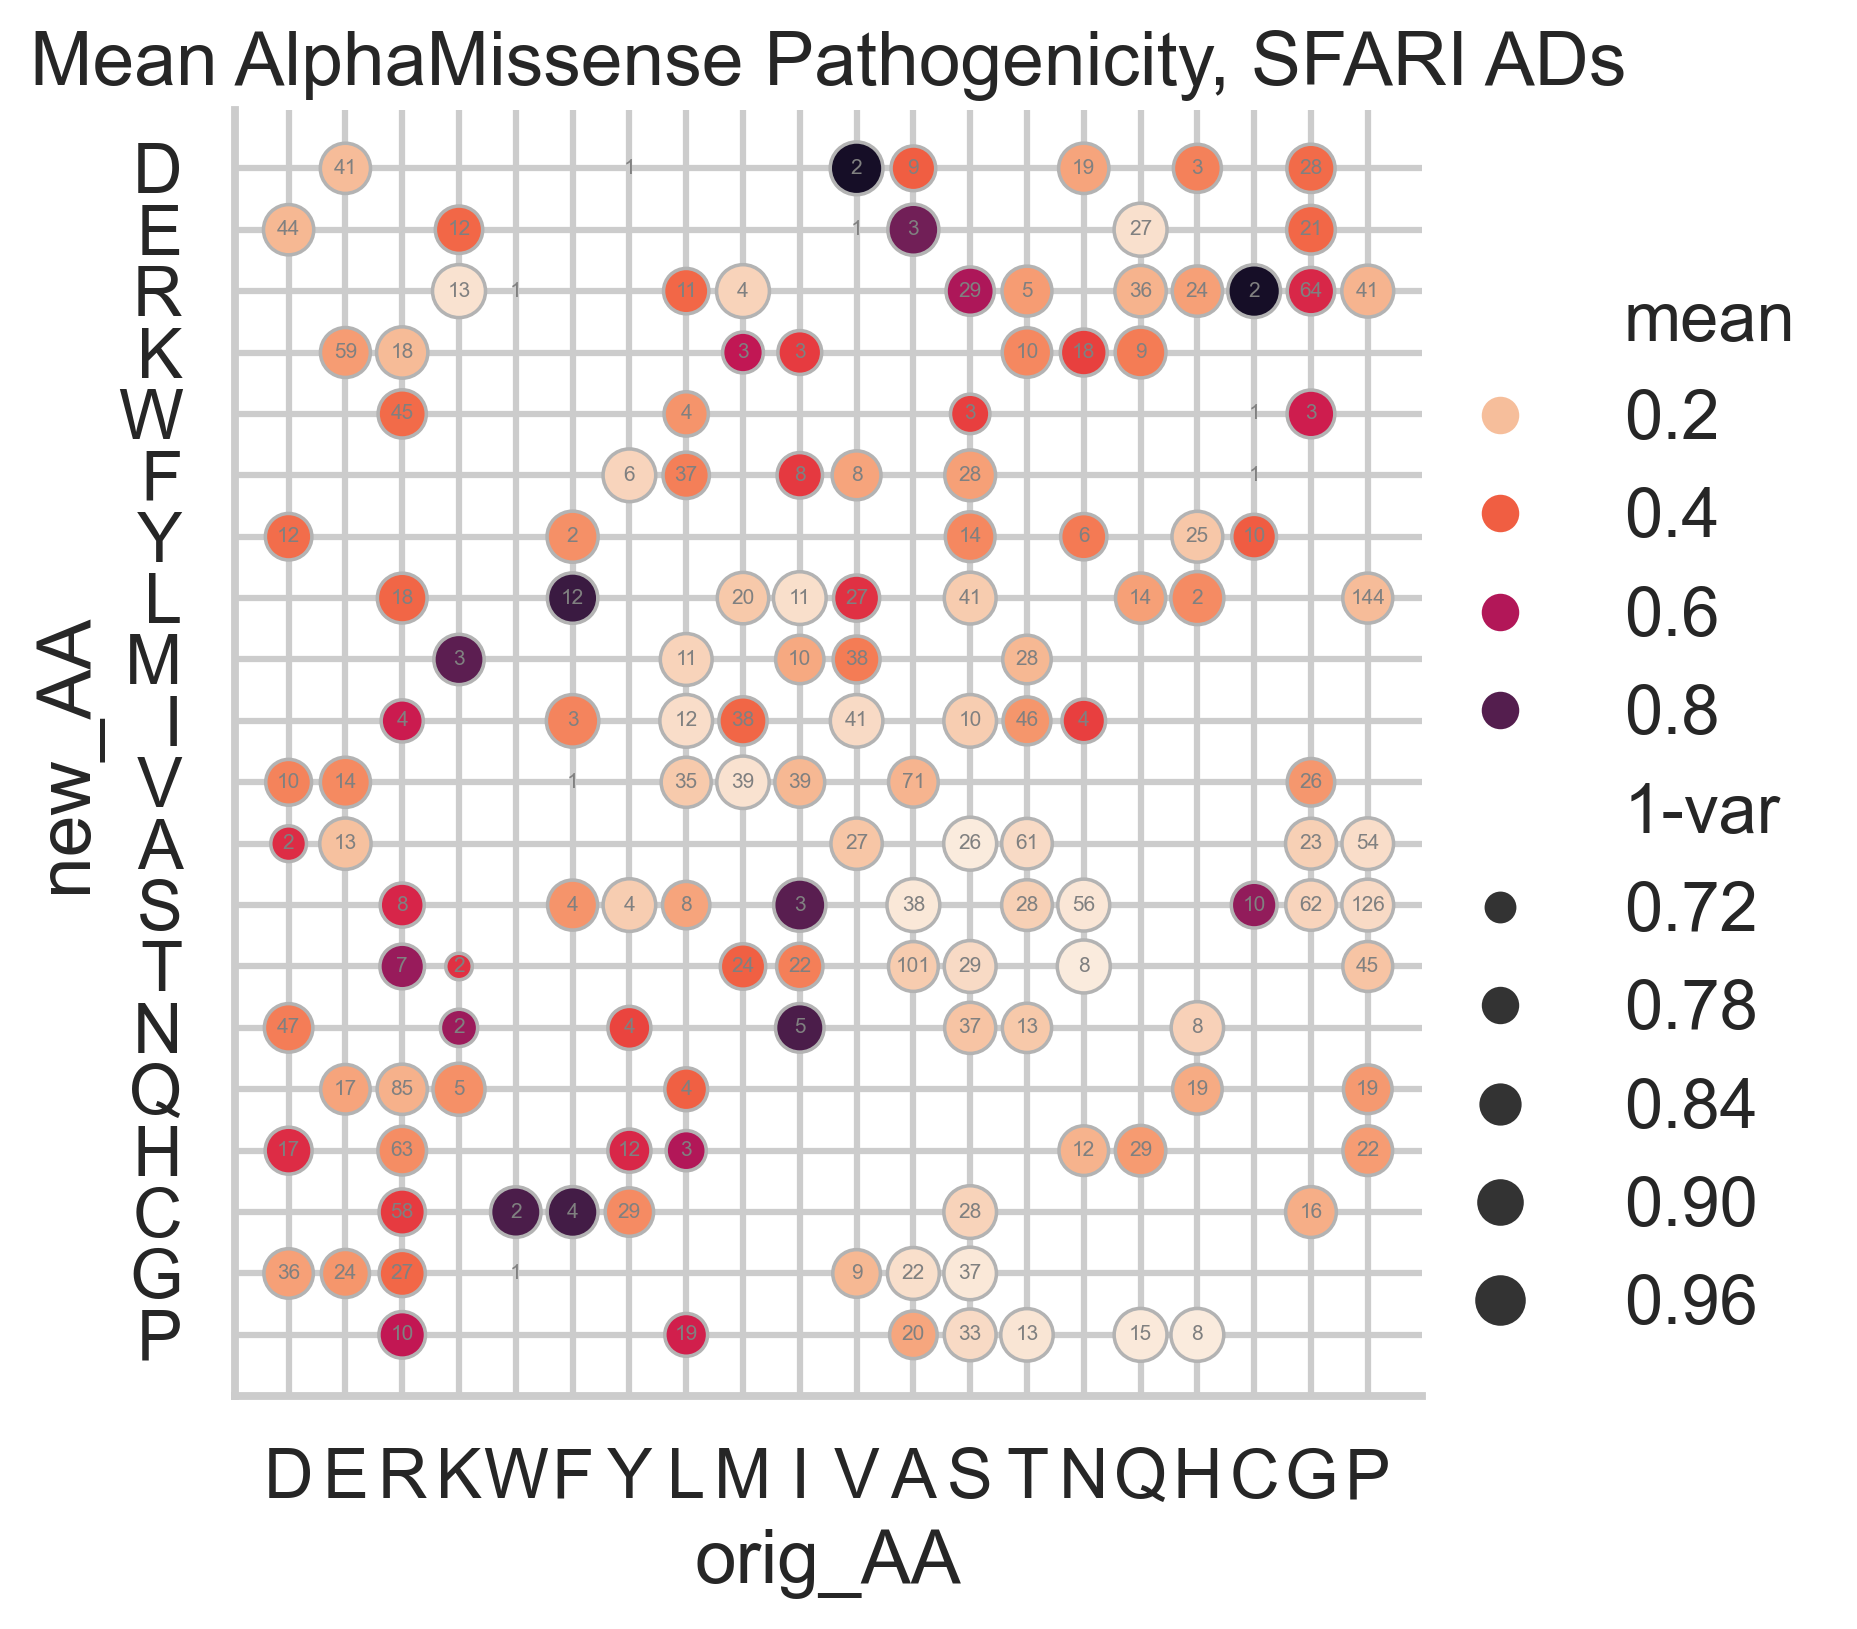

In [218]:
sns.set_context('paper')
sns.set_style("ticks")

relev_cols = merged_ad_for_heatmap.groupby(["orig_AA", "new_AA"]).agg(['mean', 'count', 'var']).reset_index()
relev_cols.columns = [' '.join(col).strip() for col in relev_cols.columns.values]

# Formatting as pivot table where values are averages
pivot_relev_cols = pd.pivot(relev_cols, values = "am_pathogenicity mean", 
                                            index = "new_AA", columns = "orig_AA")

# format rows and cols in this order
AA_order = ["D", "E", "R", "K", "W", "F", "Y", "L", "M", "I", "V", "A", "S", "T", "N", "Q", "H", "C", "G", "P"]
pivot_relev_cols = pivot_relev_cols.reindex(AA_order, axis = 0)
pivot_relev_cols = pivot_relev_cols.reindex(AA_order, axis = 1)
pivot_relev_cols


# Based on printing out for all
#cmap_bound = 4.76

fig, ax = plt.subplots(figsize=(4.5, 3.6), dpi = 300)
sns.heatmap(pivot_relev_cols, ax = ax, 
            cmap = "Reds", 
            cbar_kws = dict(location="right", label = "Average Variant Activity Difference"))
plt.yticks(rotation = 0)
plt.xlabel("Reference")
plt.ylabel("Variant")
plt.title("AlphaMissense")
plt.show()


#PLOT 2


sns.set_theme(style="whitegrid", rc={"figure.dpi": 300})
sns.set_context('talk')

relev_cols['orig_AA'] = relev_cols['orig_AA'].map(dict(zip(AA_order, np.arange(20))))
relev_cols['new_AA'] = 20 - relev_cols['new_AA'].map(dict(zip(AA_order, np.arange(20))))

relev_cols["1-var"] = 1 - relev_cols["am_pathogenicity var"]
relev_cols["mean"] = relev_cols["am_pathogenicity mean"]
# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=relev_cols,
    x="orig_AA", y="new_AA", hue="mean", size="1-var",
    palette="rocket_r", edgecolor=".7",
    height=5.5
)

for i, row in relev_cols.iterrows():
    plt.text(row['orig_AA'], row['new_AA'], int(row['am_pathogenicity count']), ha='center', va='center', fontsize = 5, color = "gray")


plt.yticks(np.arange(21), labels = [""] + list(reversed(AA_order)));
plt.xticks(np.arange(20), labels = AA_order);
plt.title("Mean AlphaMissense Pathogenicity, SFARI ADs")

# # Tweak the figure to finalize
# g.set(xlabel="", ylabel="", aspect="equal")
# g.despine(left=True, bottom=True)
# g.ax.margins(.03)

# x_labels = g.ax.get_xticklabels()
# for i, label in enumerate(x_labels):
#     label.set_color(amino_acid_colors_white[str(label)[-3]])

# y_labels = g.ax.get_yticklabels()
# for i, label in enumerate(y_labels):
#     label.set_color(amino_acid_colors_white[str(label)[-3]])

# plt.title("Zoonomia AD Interconversion, Sampling Expec.");


In [143]:
merged_ad_for_heatmap

,orig_AA,new_AA,am_pathogenicity
0,Q,P,0.0961
1,A,S,0.0713
2,V,F,0.1918
3,P,A,0.0986
4,H,Q,0.1550
...,...,...,...
3166,P,L,0.0622
3167,P,L,0.0612
3168,Q,H,0.1180
3169,Q,R,0.0884


In [151]:
mean_order = merged_ad_for_heatmap[['orig_AA', 'am_pathogenicity']].groupby("orig_AA").agg('mean').sort_values(by = "am_pathogenicity", ascending = False).index
mean_order

Index(['W', 'F', 'C', 'R', 'Y', 'K', 'G', 'D', 'I', 'L', 'V', 'M', 'E', 'H',
       'N', 'Q', 'S', 'T', 'A', 'P'],
      dtype='object', name='orig_AA')

In [154]:
merged_ad_for_heatmap['orig_AA_order'] = merged_ad_for_heatmap['orig_AA'].map(dict(zip(mean_order, np.arange(20))))
#relev_cols['new_AA_order'] = 20 - merged_ad_for_heatmap['new_AA'].map(dict(zip(mean_order, np.arange(20))))
merged_ad_for_heatmap = merged_ad_for_heatmap.sort_values(by = "orig_AA_order")
merged_ad_for_heatmap

,orig_AA,new_AA,am_pathogenicity,orig_AA_order
555,W,C,0.9660,0
999,W,G,0.9916,0
998,W,R,0.9999,0
1100,W,C,0.6784,0
2357,F,I,0.2282,1
...,...,...,...,...
1491,P,S,0.0830,19
1488,P,R,0.1201,19
1487,P,S,0.0734,19
1496,P,T,0.0693,19


In [182]:
amino_acid_colors_black = {
    # Purples
    'F': 'WFL',  
    'W': 'WFL',
    'L': 'WFL',

    # Reds
    'D': 'DE', 
    'E': 'DE', 

    # Blues
    'K': 'RK', 
    'R': 'RK', 

    # black
    'S': 'other', 
    'P': 'other',

    # greys
    'A': 'other',
    'V': 'other',
    'I': 'other',
    'M': 'other',
    'T': 'other',
    'G': 'other',
    'C': 'other',
    'N': 'other',
    'Q': 'other',
    'H': 'other',  
    'Y': 'other', 
    '-': "other"
}

In [183]:
merged_ad_for_heatmap["hue"] = merged_ad_for_heatmap["new_AA"].map(amino_acid_colors_black)
merged_ad_for_heatmap

,orig_AA,new_AA,am_pathogenicity,orig_AA_order,hue
555,W,C,0.9660,0,other
999,W,G,0.9916,0,other
998,W,R,0.9999,0,RK
1100,W,C,0.6784,0,other
2357,F,I,0.2282,1,other
...,...,...,...,...,...
1491,P,S,0.0830,19,other
1488,P,R,0.1201,19,RK
1487,P,S,0.0734,19,other
1496,P,T,0.0693,19,other


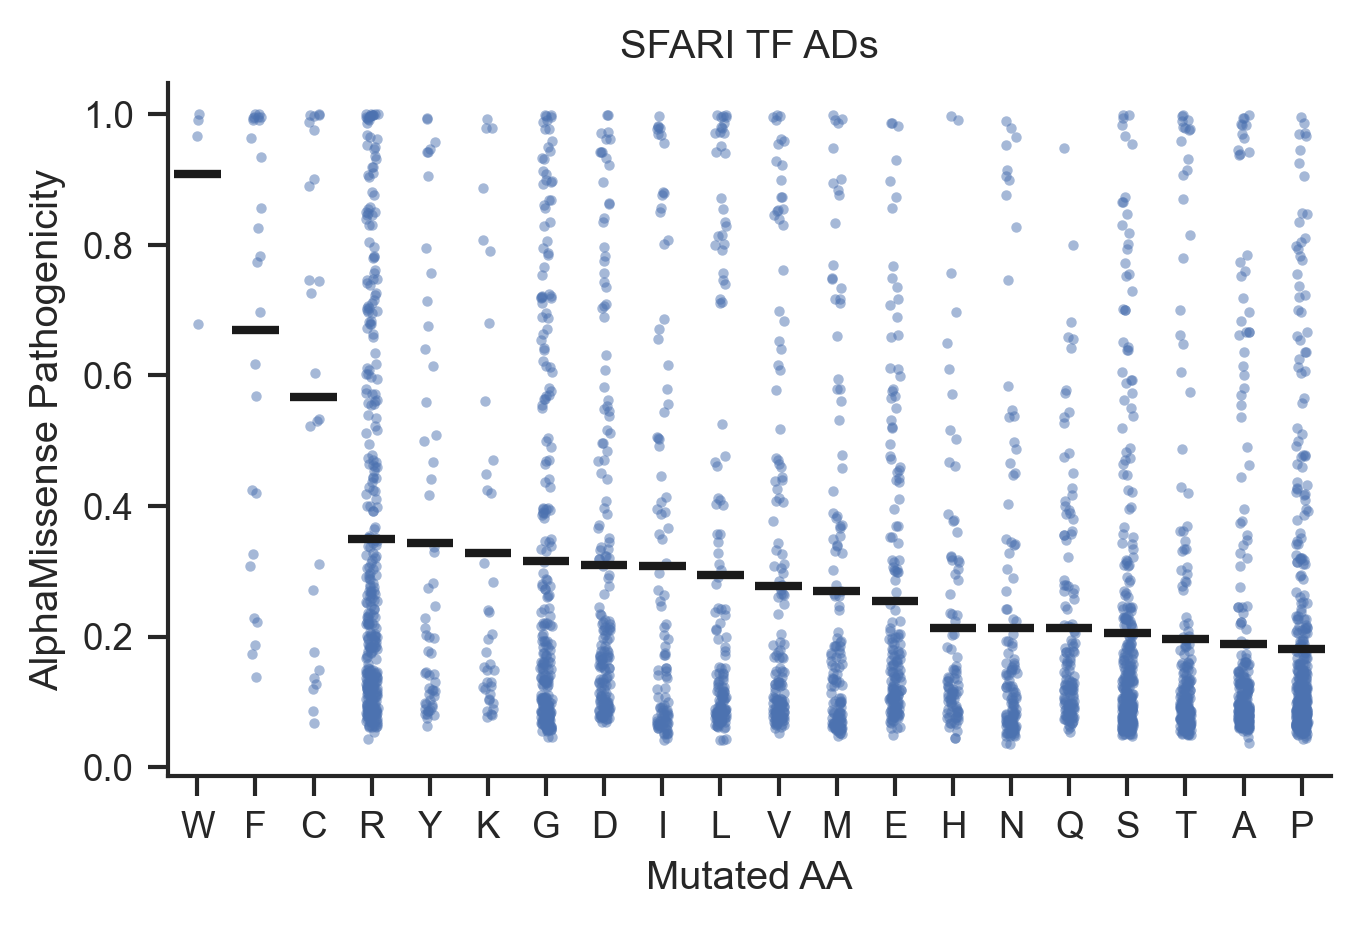

In [204]:
sns.set_style('ticks')
sns.set_context('paper')

p = sns.stripplot(data = merged_ad_for_heatmap, x= "orig_AA", y = "am_pathogenicity", legend = True, jitter = True, size = 2.5, alpha = 0.5)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="orig_AA",
            y="am_pathogenicity",
            data=merged_ad_for_heatmap,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=p)

sns.despine()
#p.legend(bbox_to_anchor=(1, 1))
plt.title("SFARI TF ADs")
plt.ylabel("AlphaMissense Pathogenicity")
plt.xlabel("Mutated AA");

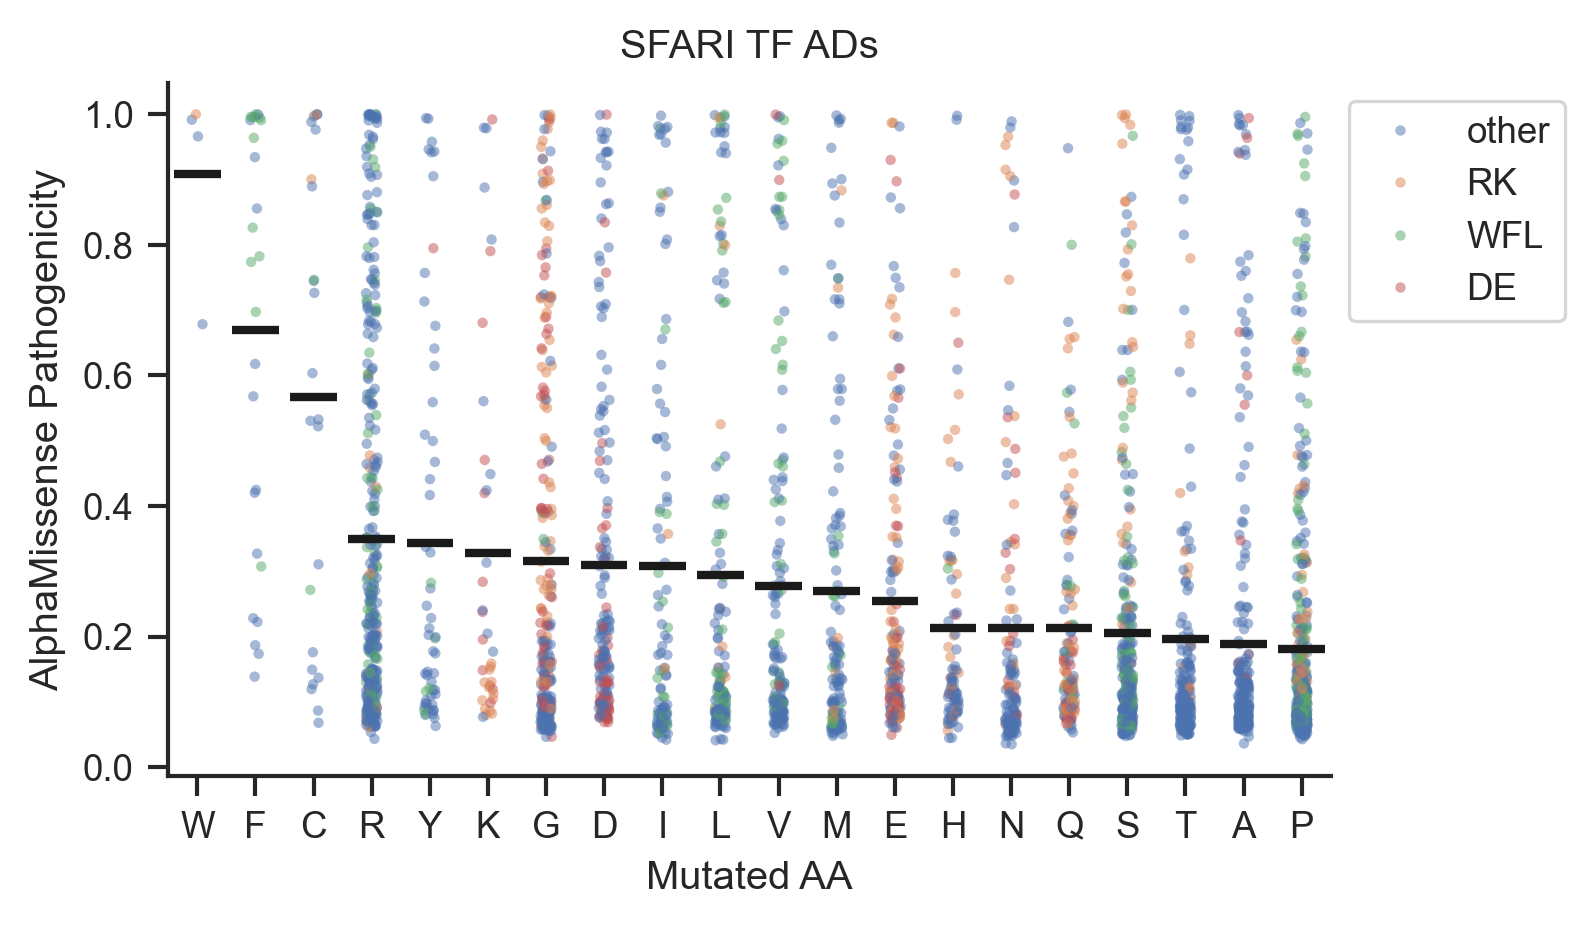

In [203]:
sns.set_style('ticks')
sns.set_context('paper')

p = sns.stripplot(data = merged_ad_for_heatmap, x= "orig_AA", y = "am_pathogenicity", hue = "hue", legend = True, jitter = True, size = 2.5, alpha = 0.5)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="orig_AA",
            y="am_pathogenicity",
            data=merged_ad_for_heatmap,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=p)

sns.despine()
p.legend(bbox_to_anchor=(1, 1))
plt.title("SFARI TF ADs")
plt.ylabel("AlphaMissense Pathogenicity")
plt.xlabel("Mutated AA");